## Exploring Sternberg data

In [180]:
# import packages

import pandas as pd
import seaborn as sns
from scipy.stats import ttest_rel
from scipy.stats import linregress
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf

sns.set_context("notebook", font_scale=1.5)

In [182]:
# load data

data = pd.read_csv("https://raw.githubusercontent.com/ethanweed/ExPsyLing/master/datasets/Sternberg/2021/Sternberg_cleaned.csv")


## Inspect the data

In [183]:
# look at the actual data

data.head()

,setSize,present,id,rt
0,1,n,1,407.000000
1,1,n,2,848.500000
2,1,n,3,549.333333
3,1,n,4,982.333333
4,1,n,5,568.000000


## Plot the data

Here I have plotted all the indivdual data points, plus two regression lines. I have added a bit of random noise (jitter) to the x-axis, so that we can see all data points. By plotting two different lines through the data, I am foreshadowing a multiple linear regression analysis: using both `setSize` and `present` to model the data.

Text(0.5, 1.1, 'Response time (ms) for differently-sized memory sets')

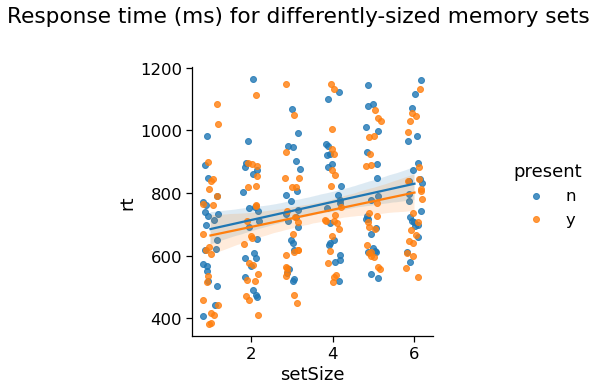

In [184]:

ax = sns.lmplot(
    data = data,
    x = "setSize", y = "rt",
    hue = "present",
    x_jitter = 0.2
)

ax.fig.suptitle("Response time (ms) for differently-sized memory sets",
               y=1.1)

## Make a Sternberg-style plot

To better understand our results, I would like to make a plot that resembles Sternberg's as closely as possible.

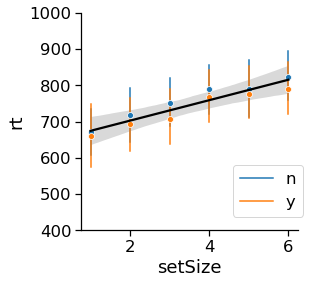

In [193]:
# Make Sternberg-style plot

# plot the mean value for each set size, for positive and negative memory sets,
# with error bars, but don't make two different lines
ax = sns.lineplot(x='setSize', y='rt', data=data, marker='o', hue = 'present', linestyle='', err_style='bars')

# overlay a single line, modelling response time only as a function of setSize
ax = sns.regplot(x='setSize', y='rt', marker = '', color = 'black', data=data)

# shorten the y-axis a little, since we are no longer plotting all the data points
ax.set_ylim(400, 1000)

# make the plot square, to look more like Sternberg's
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))

# tuck the legend into an inobstrusive corner
plt.legend(bbox_to_anchor=(.7, .3), loc=2, borderaxespad=0.)

# remove the top and bottom borders, even though Sternberg didn't.
sns.despine()

## Correlation

A single straight line through the data points can be interpeted as a correlation. We can plot this with e.g. `regplot`, and calculate the Pearson's correlation coefficient (r) using `.corr()`

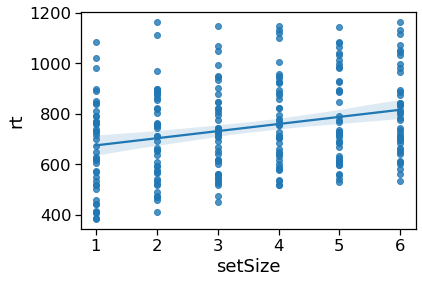

In [155]:


# plot the data with a single 
ax = sns.regplot(data = data, x = 'setSize', y = 'rt')

In [194]:
# calculate r and round off to the nearest 3 decimal places
r = 'r = ' + str(round(data['setSize'].corr(data['rt']), 3))
r

'r = 0.266'

## Linear regression

Pearson's correlation calculates the strength of the relationship between two variables (in our case `setSize` and `rt`, but we can also go a step further and caclulate a linear regression. In a regression analysis, we think of one variable as "predicting" values in another variable. The regression line, that is, the slope and y-intercept of the line, is our model. A simple way to do this is with `scipy.stats.lingress`.

In [199]:
from scipy.stats import linregress

res = linregress(data['setSize'], data['rt'])

res


LinregressResult(slope=28.16583683101391, intercept=646.3428547386319, rvalue=0.2661705204139128, pvalue=1.8537720725147673e-05, stderr=6.4511386658734535, intercept_stderr=25.12357557440091)

Again, for a single predictor, this is the same as correlation. The r-value is the same.  However, in linear regression, we usually report the $R^2$ value, which represents the amount of variance in the data accounted for by our model. This becomes important when e.g. comparing models that might have more than one predictor. To obtain $R^2$ from `lingress`, you can just multiply the r-value by itself:


In [205]:
print('R2 = ', res.rvalue**2)

R2 =  0.07084674593741318


## Multiple linear regression

Then again, maybe we want to model our data with more than one predictor. In that case, we can turn to multiple regression. Here the best option in my opinion is to use `statsmodels`. With `statsmodels`, we define our model as a "formula". This is also the typcial way models our defined in the R programming language. We use a `~` to mean "predicted by", so `rt ~ setSize` means "rt predicted by setSize". We can start with a one-predictor model, to verify that the results are the same as `lingress`:

In [206]:
# Basic model: same as scipy linregres

import statsmodels.formula.api as smf

formula = "rt ~ setSize"
model1 = smf.ols(formula = formula, data=data).fit()
model1.summary()


Yup. There is a lot of output here, but the $R^2$ is the same as we found with `lingress`: 0.071. And in fact, if we take the square root for that, we are all the way back to our r-value from the Pearson correlation:

In [209]:
import math
print('r = ', math.sqrt(0.071))


r =  0.2664582518894845


Now we can also add a second predictor. In this case, we have one other variable we can use to "account for" or "explain" the variation in our data: the presence/absence condition. With `statsmodels`, we can just add our second predictor variable to the formula:

In [210]:
# Model with two predictors

formula = "rt ~ setSize + present"
model2 = smf.ols(formula = formula, data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     rt   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     10.15
Date:                Tue, 02 Nov 2021   Prob (F-statistic):           5.77e-05
Time:                        22:40:49   Log-Likelihood:                -1657.3
No. Observations:                 252   AIC:                             3321.
Df Residuals:                     249   BIC:                             3331.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      658.5391     27.421     24.016      0.000     604.533     712.545
present[T.y]   -24.3924     22.025     -1.107      0.269     -67.771      18.986
setSize         28.1658      6.448      4.368      0.000      15.466      40.866
==============================================================================
Omnibus:                       15.710   Durbin-Watson:                   2.744
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.208
Skew:                           0.440   Prob(JB):                      0.00223
Kurtosis:                       2.376   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interstingly enough, adding a second predictor didn't do a lot to improve our model. Put another way, if we had to guess what any participants response time for a particular item was, we wouldn't really be any more accurate if we know whether the value came from a positive or negative memory set than we would be if we only know the size of the memory set. We can actually do a significance test on the two models, to see if there is any signficant difference between the two. In this case, we get a $p$-value of 0.27:

In [212]:
from statsmodels.stats.anova import anova_lm
anova_lm(model1, model2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,250.0,7.647159e+06,0.0,NaN,NaN,NaN
1,249.0,7.609674e+06,1.0,37484.471827,1.226548,0.269148


## paired t-test: present vs. absent

Finally, if we wanted to, we could also simply compare the mean of the values from the negative memory set condition and the positive memory set condition with a $t$-test. We will use a paired $t$-test, because the data come from the same participants in both conditions:

In [224]:
from scipy.stats import ttest_rel

df_ttest = pd.DataFrame(
    {'present': list(data.loc[data['present'] == 'y']['rt']),
     'absent': list(data.loc[data['present'] == 'n']['rt'])
     })

t, p = ttest_rel(df_ttest['absent'], df_ttest['present'])
print('t =', round(t, 3))
print('p =', round(p, 3))

t = 2.32
p = 0.022


### Plotting t-test results

Plotting the means of the two memory set conditions can either exaggerate or diminish their apparent differences:

<AxesSubplot:>

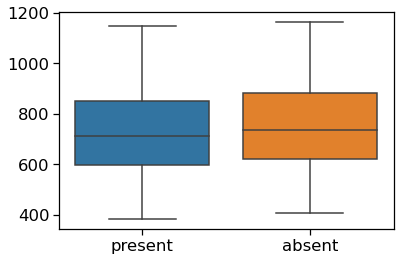

In [225]:
sns.boxplot(data = df_ttest)

<AxesSubplot:>

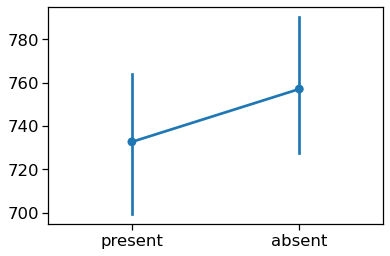

In [230]:
sns.pointplot(data = df_ttest)

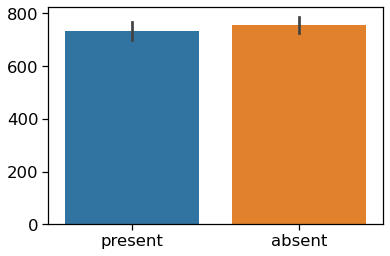

In [231]:
ax = sns.barplot(data = df_ttest)

To my eye, the pointplot makes the means look more different from each other, and the barplot and boxplot make them look more similar. The data are the same in all cases, of course.

## Conclusion

So, in our data, there is a signficiant difference between the overall mean of response times in the positive and negative memory sets, but adding the positive vs. negative memory set variable to the regression model didn't significantly improve our ability to account for our results. There are other sources of variance left unaccounted for. In fact, there is quite a lot of variance unaccounted for in our data: Sternberg reports an $R^2$ of 0.994, that is 99.4 % of the variance accounted for by the model, while our $R^2$ is only 0.075.